# PyTorch-Lightning Data Module

In this module, we quickly demonstrate how to use the PyTorch-Lightning Module which already has the preliminary steps for preprocessing. We assume the data is already downloaded and organized in this demo.

In [3]:
# Helpful trick for loading the directories correction
import sys, os
from pyprojroot import here
# spyder up to find the root
root = here(project_files=[".here"])
# append to path
sys.path.append(str(here()))


from src.data.worldfloods.dataset import WorldFloodsDatasetTiled

# MATPLOTLIB Settings
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# SEABORN SETTINGS
import seaborn as sns
sns.set_context(context='talk',font_scale=0.7)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Demo Images

For this demonstration, we need a S2 AND a groundtruth image. We have two that we can download.

In [6]:
from src.data.worldfloods.test_download import download_demo_trainsplit_image
from pathlib import Path

destination_dir = Path(root).joinpath("datasets/demo_images")


In [7]:
download_demo_trainsplit_image(dest_dir=destination_dir)

Folder '/home/jemanjohnson34/projects/ml4floods/datasets/demo_images/train/S2' is created.
Folder '/home/jemanjohnson34/projects/ml4floods/datasets/demo_images/train/gt' is created.
Folder '/home/jemanjohnson34/projects/ml4floods/datasets/demo_images/val/S2' is created.
Folder '/home/jemanjohnson34/projects/ml4floods/datasets/demo_images/val/gt' is created.
Folder '/home/jemanjohnson34/projects/ml4floods/datasets/demo_images/test/S2' is created.
Folder '/home/jemanjohnson34/projects/ml4floods/datasets/demo_images/test/gt' is created.


In [13]:
!ls $destination_dir/train

S2  gt


## PL - DataModule

#### 1.1 - Initialize Data Module

In [15]:
from src.data.worldfloods.lightning import WorldFloodsDataModule

wf_dm = WorldFloodsDataModule(
    data_dir=str(destination_dir),
    input_folder="S2",
    target_folder="gt",
    train_transformations=None,
    test_transformations=None,
    
)

#### 1.2 - Prepare Data

In [16]:
wf_dm.prepare_data()

#### 1.3 - Run Setup

In [17]:
wf_dm.setup()

#### 1.4 - Load Datasets (Optional)

In [18]:
train_ds = wf_dm.train_dataset
val_ds = wf_dm.val_dataset
test_ds = wf_dm.test_dataset

print(len(wf_dm.train_dataset), len(wf_dm.val_dataset), len(wf_dm.test_dataset))

1395 256 112


#### 1.5 - Load DataLoaders

In [19]:
train_dl = wf_dm.train_dataloader()
val_dl = wf_dm.val_dataloader()
test_dl = wf_dm.test_dataloader()

print(len(train_dl), len(val_dl), len(test_dl))

44 8 4


## Demo - Train/Val/Test

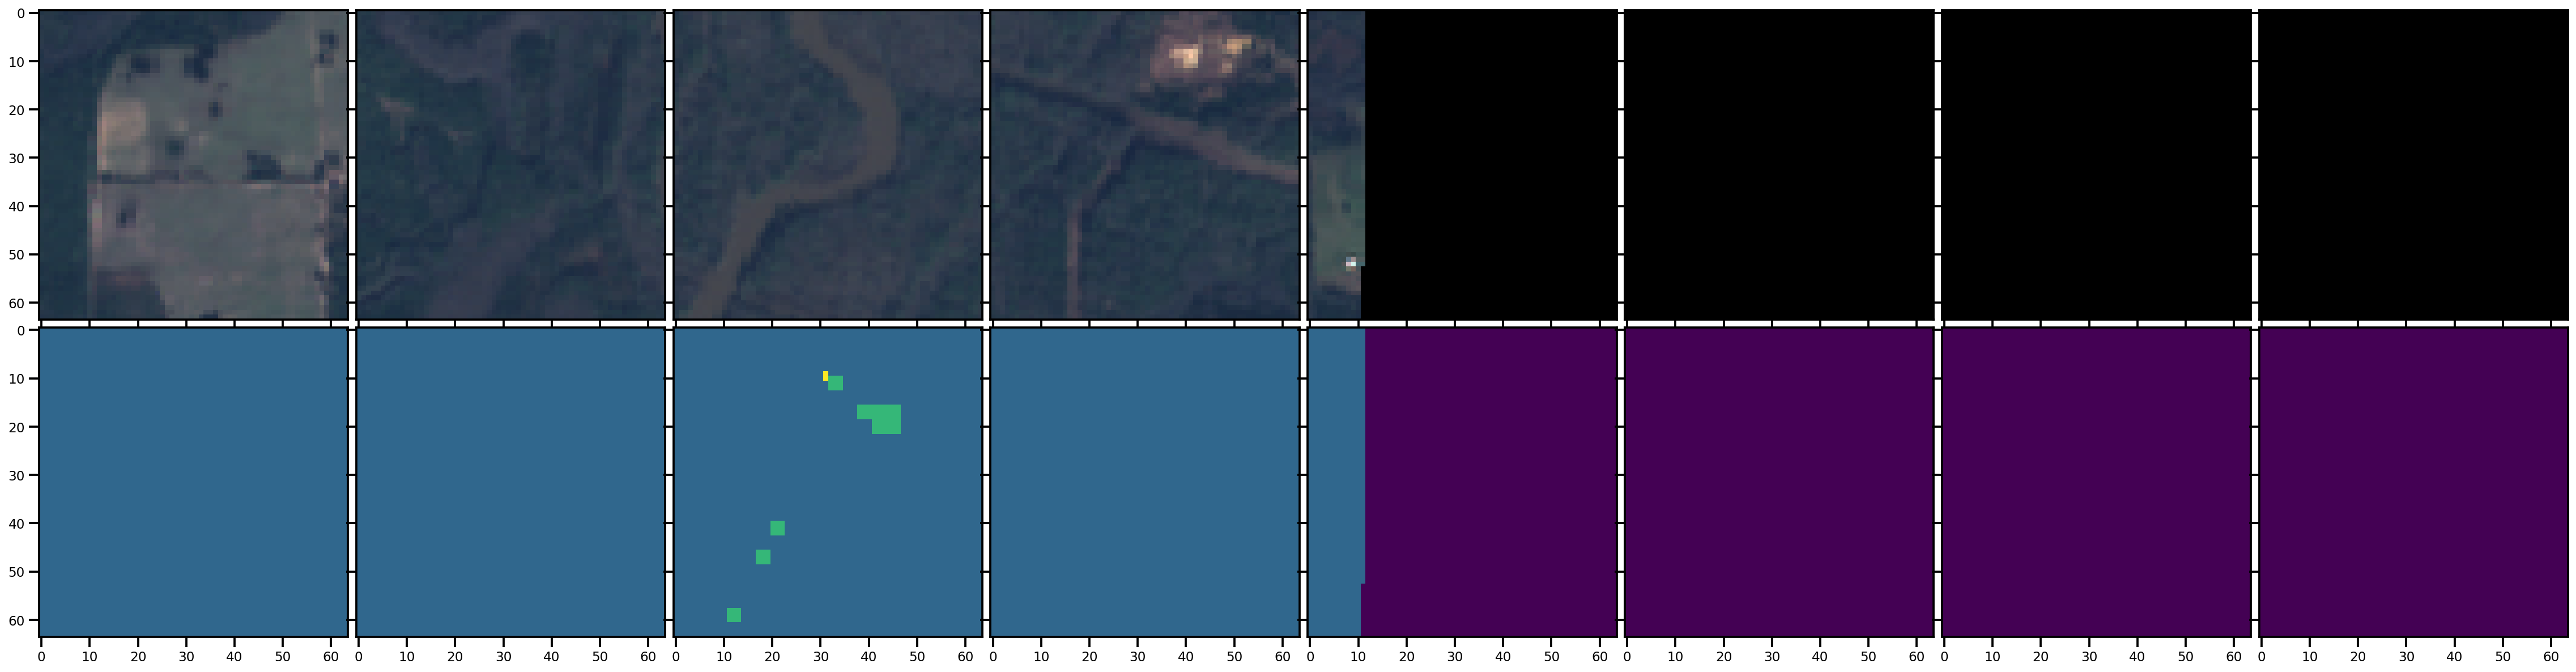

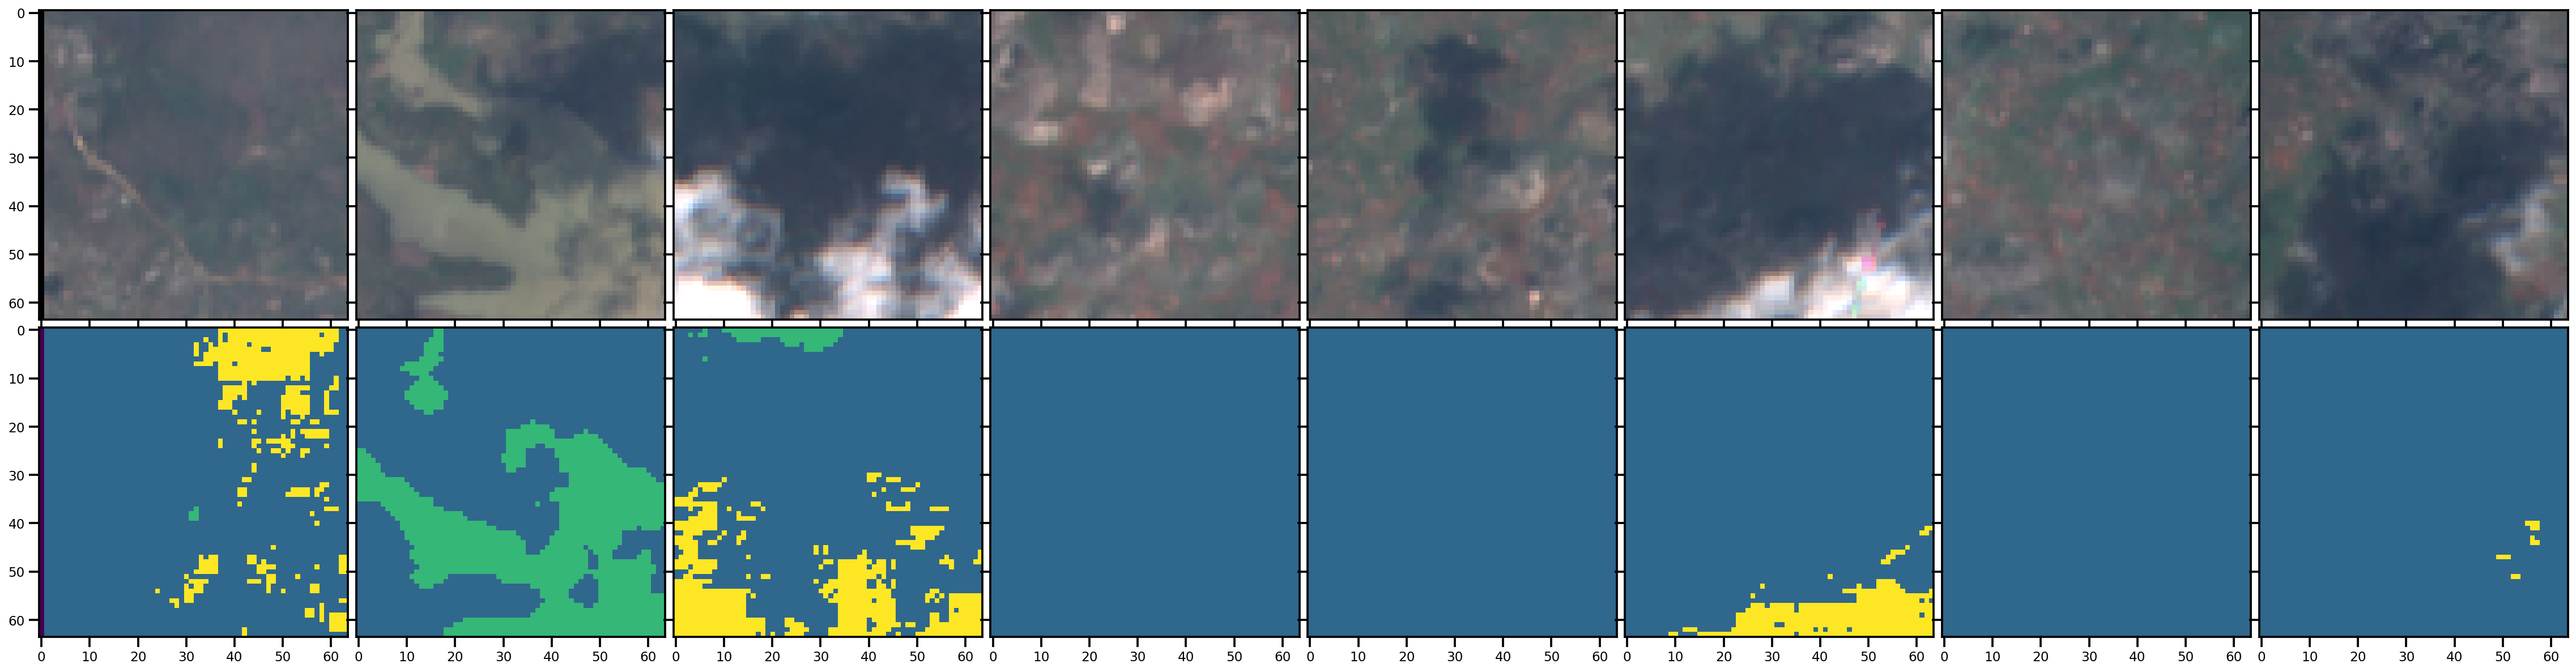

StopIteration: 

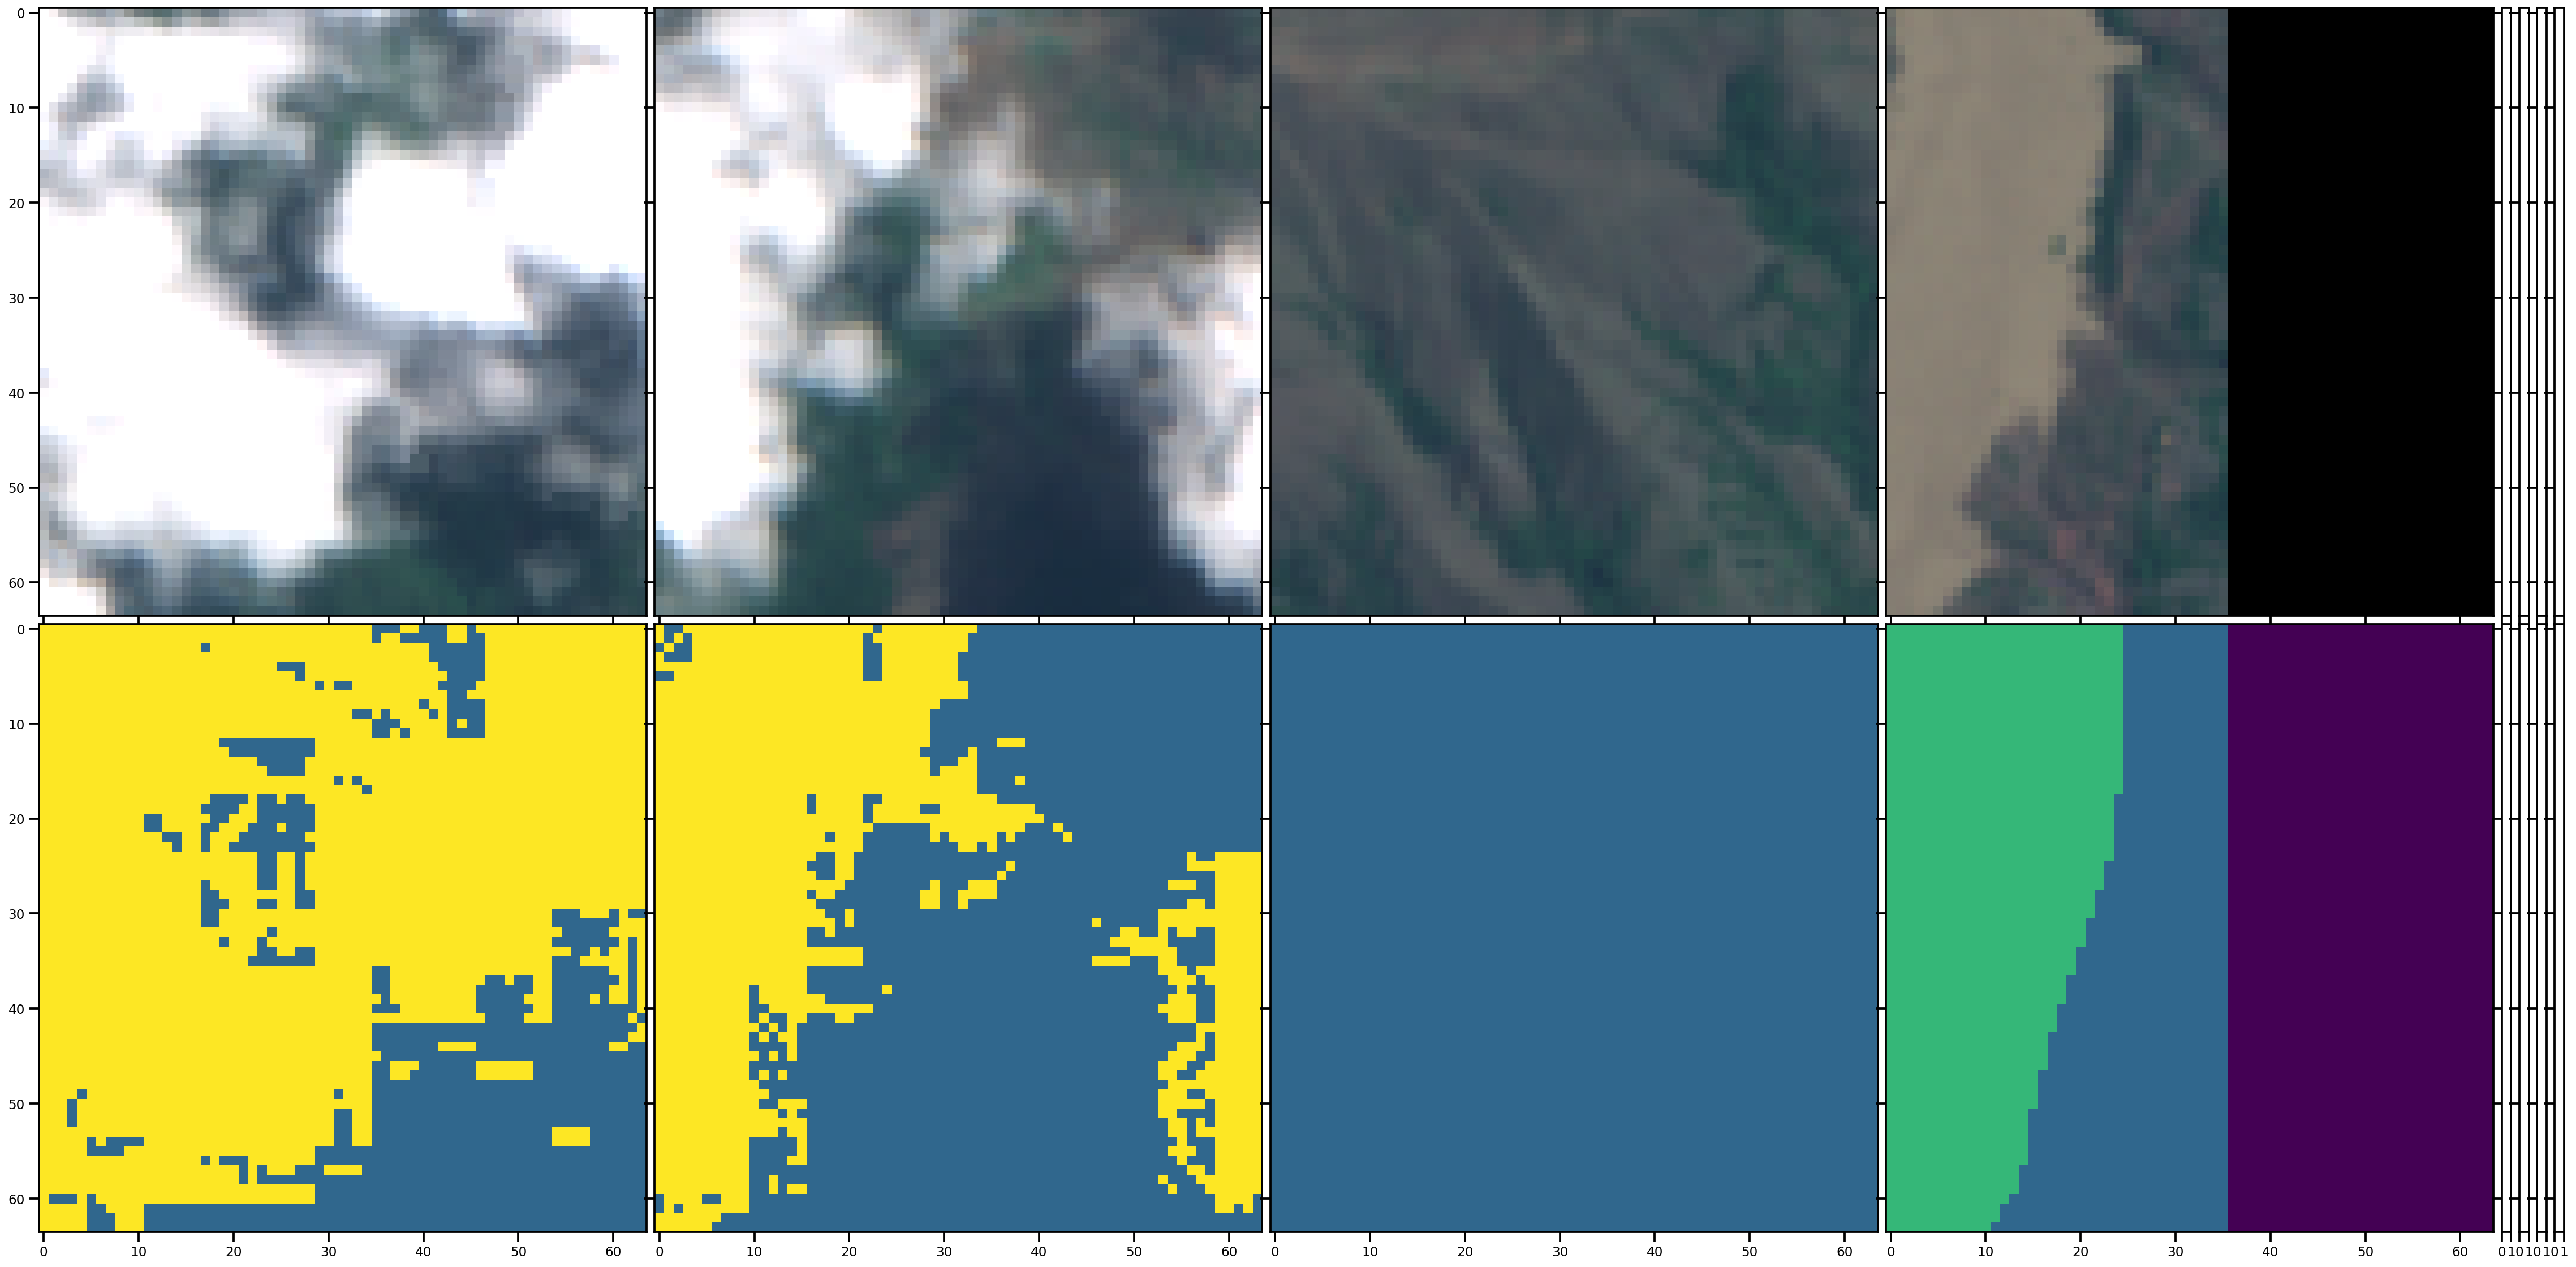

In [20]:
from rasterio.plot import show as rasterio_show
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

for iloader in [train_dl, val_dl, test_dl]:
    n_tiles = 16
    n_rows = 2
    tiles_per_row = int(n_tiles / n_rows)
    iteration = 0

    # plot preamble
    fig = plt.figure(figsize=(40, 20))
    grid = ImageGrid(
        fig, 111,
        nrows_ncols=(2, tiles_per_row),
        axes_pad=0.1,
    )

    # BANDS
    bands = [6,] #CHANNELS_CONFIGURATIONS["all"]
    
    dl_iterator = enumerate(iloader)
    for _i in range(tiles_per_row):
        _, tile_data = next(dl_iterator)
        batch_index = 2
        rgb = np.clip(tile_data["image"][batch_index,(3,2,1),...].numpy().transpose(1,2,0)/3000.,0,1)
        labels = tile_data["mask"][batch_index,0]
                
        grid[_i].imshow(rgb)
        grid[tiles_per_row+ _i].imshow(labels,vmin=0,vmax=3)
        
    plt.show()